In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import r2_score
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, r2_score
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
Brain_final_df = pd.read_csv("Brain variables and proteomics data.csv")

C:\Users\Romina\AppData\Local\Temp\ipykernel_31660\1591644362.py:1: DtypeWarning: Columns (20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,

In [3]:
proteomics_file = r"C:\Users\Romina\OneDrive\Desktop\Project\Clean Notebooks and files\proteomics_preprocessed.csv"
proteomics_df = pd.read_csv(proteomics_file)

C:\Users\Romina\AppData\Local\Temp\ipykernel_31660\889670466.py:2: DtypeWarning: Columns (25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,

In [4]:
phenotype = r"c:\Users\Romina\Downloads\ukb674360 (1).txt"

In [5]:
columns_to_include = [
    "eid", "31-0.0", "34-0.0", 
    "30000-2.0", "30010-0.0", "30010-1.0", "30010-2.0",
    "30020-0.0", "30020-1.0", "30020-2.0",
    "30030-0.0", "30030-1.0", "30030-2.0",
    "30040-0.0", "30040-1.0", "30040-2.0",
    "30050-0.0", "30050-1.0", "30050-2.0",
    "30060-0.0", "30060-1.0", "30060-2.0",
    "30070-0.0", "30070-1.0", "30070-2.0",
    "30080-0.0", "30080-1.0", "30080-2.0",
    "30090-0.0", "30090-1.0", "30090-2.0",
    "30100-0.0", "30100-1.0", "30100-2.0",
    "30110-0.0", "30110-1.0", "30110-2.0",
    "30160-2.0", "30170-0.0", "30170-1.0", "30170-2.0",
    "30220-2.0", "30230-0.0", "30230-1.0", "30230-2.0",
    "30240-0.0", "30240-1.0", "30240-2.0",
    "30250-0.0", "30250-1.0", "30250-2.0",
    "30260-0.0", "30260-1.0", "30260-2.0",
    "30270-0.0", "30270-1.0", "30270-2.0",
    "30280-0.0", "30280-1.0", "30280-2.0",
    "30290-0.0", "30290-1.0", "30290-2.0",
    "30300-0.0", "30300-1.0", "30300-2.0"
]


In [6]:
Blood_pheno = pd.read_csv( phenotype, usecols=columns_to_include, sep="\t", on_bad_lines='skip')

In [7]:
Blood_pheno

eid  31-0.0  34-0.0  30000-2.0  30010-0.0  30010-1.0  30010-2.0  \
NaN 1000018  1.0    1954  1045.0      4.105        NaN        NaN      12.89   
    1000024  1.0    1940  1051.0      3.990        NaN        NaN      13.30   
    1000031  1.0    1948  1058.0      4.097        NaN        NaN      13.26   
    1000043  1.0    1945  2817.0      4.246        NaN        NaN      14.40   
    1000059  1.0    1952  1045.0      4.910        NaN        NaN      14.10   
...          ...     ...     ...        ...        ...        ...        ...   
    4946719  1.0    1942  2815.0      4.299        NaN        NaN      13.98   
    4946727  1.0    1943   156.0      4.656        NaN        NaN      14.52   
    4946736  1.0    1949  2816.0      4.055        NaN        NaN      12.65   
    4946742  1.0    1958  2817.0      5.140        NaN        NaN      15.30   
    4946758  1.0    1957  2815.0        NaN        NaN        NaN        NaN   

             30020-0.0  30020-1.0  30020-2.0  ...  30270-2.0  30280-0.0  \
NaN 1000018        NaN        NaN      38.21  ...      0.278        NaN   
    1000024        NaN        NaN      38.10  ...      0.210        NaN   
    1000031        NaN        NaN      37.45  ...      0.269        NaN   
    1000043        NaN        NaN      42.88  ...      0.217        NaN   
    1000059        NaN        NaN      40.60  ...      0.360        NaN   
...                ...        ...        ...  ...        ...        ...   
    4946719        NaN        NaN      39.79  ...      0.257        NaN   
    4946727        NaN        NaN      43.01  ...      0.269        NaN   
    4946736        NaN        NaN      37.59  ...      0.292        NaN   
    4946742        NaN        NaN      44.60  ...      0.260        NaN   
    4946758        NaN        NaN        NaN  ...        NaN        NaN   

             30280-1.0  30280-2.0  30290-0.0  30290-1.0  30290-2.0  30300-0.0  \
NaN 1000018        NaN      0.325        NaN        NaN      0.013        NaN   
    1000024        NaN      0.230        NaN        NaN      0.009        NaN   
    1000031        NaN      0.510        NaN        NaN      0.021        NaN   
    1000043        NaN      0.247        NaN        NaN      0.010        NaN   
    1000059        NaN      0.430        NaN        NaN      0.021        NaN   
...                ...        ...        ...        ...        ...        ...   
    4946719        NaN      0.187        NaN        NaN      0.008        NaN   
    4946727        NaN      0.345        NaN        NaN      0.016        NaN   
    4946736        NaN      0.749        NaN        NaN      0.030        NaN   
    4946742        NaN      0.280        NaN        NaN      0.014        NaN   
    4946758        NaN        NaN        NaN        NaN        NaN        NaN   

             30300-1.0  30300-2.0  
NaN 1000018        NaN      46.79  
    1000024        NaN      45.72  
    1000031        NaN        NaN  
    1000043        NaN      47.62  
    1000059        NaN      44.49  
...                ...        ...  
    4946719        NaN        NaN  
    4946727        NaN      47.29  
    4946736        NaN      41.92  
    4946742        NaN      43.31  
    4946758        NaN        NaN  

[394668 rows x 66 columns]

In [8]:
if isinstance(Blood_pheno.index, pd.MultiIndex):
    Blood_pheno = Blood_pheno.reset_index()

In [9]:
Blood_pheno.drop(columns=["level_0"], inplace=True)

In [10]:
Blood_pheno.rename(columns={"level_1": "temp_eid"}, inplace=True)

In [11]:
old_cols = Blood_pheno.columns.tolist()
num_cols = len(old_cols)

In [12]:
new_cols = [None] * num_cols

In [13]:
new_cols[0] = "eid"

In [14]:
for i in range(1, num_cols - 1):
    new_cols[i] = old_cols[i + 1]

In [15]:
new_cols[-1] = "unknown"

In [16]:
Blood_pheno.columns = new_cols

In [17]:
columns_to_drop = ["unknown", "31-0.0", "34-0.0", "30000-2.0", "30160-2.0", "30220-2.0"]
Blood_pheno.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [18]:
Blood_pheno

,eid,30010-0.0,30010-1.0,30010-2.0,30020-0.0,30020-1.0,30020-2.0,30030-0.0,30030-1.0,30030-2.0,...,30270-2.0,30280-0.0,30280-1.0,30280-2.0,30290-0.0,30290-1.0,30290-2.0,30300-0.0,30300-1.0,30300-2.0
0,1000018,4.105,NaN,NaN,12.89,NaN,NaN,38.21,NaN,NaN,...,NaN,0.278,NaN,NaN,0.325,NaN,NaN,0.013,NaN,NaN
1,1000024,3.990,NaN,NaN,13.30,NaN,NaN,38.10,NaN,NaN,...,NaN,0.210,NaN,NaN,0.230,NaN,NaN,0.009,NaN,NaN
2,1000031,4.097,NaN,NaN,13.26,NaN,NaN,37.45,NaN,NaN,...,NaN,0.269,NaN,NaN,0.510,NaN,NaN,0.021,NaN,NaN
3,1000043,4.246,NaN,NaN,14.40,NaN,NaN,42.88,NaN,NaN,...,NaN,0.217,NaN,NaN,0.247,NaN,NaN,0.010,NaN,NaN
4,1000059,4.910,NaN,NaN,14.10,NaN,NaN,40.60,NaN,NaN,...,NaN,0.360,NaN,NaN,0.430,NaN,NaN,0.021,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394663,4946719,4.299,NaN,NaN,13.98,NaN,NaN,39.79,NaN,NaN,...,NaN,0.257,NaN,NaN,0.187,NaN,NaN,0.008,NaN,NaN
394664,4946727,4.656,NaN,NaN,14.52,NaN,NaN,43.01,NaN,NaN,...,NaN,0.269,NaN,NaN,0.345,NaN,NaN,0.016,NaN,NaN
394665,4946736,4.055,NaN,NaN,12.65,NaN,NaN,37.59,NaN,NaN,...,NaN,0.292,NaN,NaN,0.749,NaN,NaN,0.030,NaN,NaN
394666,4946742,5.140,NaN,NaN,15.30,NaN,NaN,44.60,NaN,NaN,...,NaN,0.260,NaN,NaN,0.280,NaN,NaN,0.014,NaN,NaN


In [19]:
Blood_pheno.to_csv("correct but original Blood pheno.csv", index=False)

In [20]:
# keep only shared participants
shared_eids = set(proteomics_df['eid']).intersection(set(Blood_pheno['eid']))
print(f"shared eids: {len(shared_eids)}")

shared eids: 41305


In [21]:
shared_eids = set(proteomics_df['eid']).intersection(set(Blood_pheno['eid']))
proteomics_shared = proteomics_df[proteomics_df['eid'].isin(shared_eids)].copy()
Blood_pheno_shared = Blood_pheno[Blood_pheno['eid'].isin(shared_eids)].copy()

In [22]:
Blood_merged_df = pd.merge(proteomics_shared,Blood_pheno_shared, on="eid", how="inner")

In [23]:
Blood_merged_df

,eid,Sex,Ethnic_background,Age_at_recruitment,Diagnoses_main_ICD10,Diagnoses_main_ICD10_1,Diagnoses_main_ICD10_2,Diagnoses_main_ICD10_3,Diagnoses_main_ICD10_4,Diagnoses_main_ICD10_5,...,30270-2.0,30280-0.0,30280-1.0,30280-2.0,30290-0.0,30290-1.0,30290-2.0,30300-0.0,30300-1.0,30300-2.0
0,1000024,0,1001.0,67,F019,G309,I48,I620,I639,M169,...,NaN,0.210,NaN,NaN,0.230,NaN,NaN,0.009,NaN,NaN
1,1000043,1,1001.0,65,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.217,NaN,NaN,0.247,NaN,NaN,0.010,NaN,NaN
2,1000156,0,1001.0,62,E871,H258,H269,R074,NaN,NaN,...,NaN,0.340,NaN,NaN,0.480,NaN,NaN,0.021,NaN,NaN
3,1000217,1,1003.0,63,C060,I269,R509,R69,NaN,NaN,...,NaN,0.217,NaN,NaN,0.299,NaN,NaN,0.014,NaN,NaN
4,1000309,1,4002.0,60,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.384,NaN,NaN,0.590,NaN,NaN,0.025,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41300,4946434,0,1001.0,62,A419,C509,G510,H042,I48,J690,...,NaN,0.226,NaN,NaN,0.125,NaN,NaN,0.006,NaN,NaN
41301,4946496,1,1001.0,67,C19,D124,D126,D235,I251,K029,...,NaN,0.344,NaN,NaN,0.794,NaN,NaN,0.040,NaN,NaN
41302,4946567,0,1001.0,41,A419,B59,C910,D728,J100,K635,...,NaN,0.306,NaN,NaN,0.172,NaN,NaN,0.006,NaN,NaN
41303,4946648,0,1001.0,53,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.239,NaN,NaN,0.173,NaN,NaN,0.008,NaN,NaN


In [24]:
Blood_cols_of_interest = ["30010-0.0"] 
features_df = Blood_pheno_shared[Blood_pheno_shared[Blood_cols_of_interest].notna().any(axis=1)].copy()

In [25]:
start_col = "30010-0.0"
start_idx = list(features_df.columns).index(start_col)
features_cols_to_preprocess = features_df.columns[start_idx:]
features_cols_to_preprocess = features_cols_to_preprocess.drop("eid", errors="ignore")

In [26]:
# Missing value filter (≤50% missing)
missing_ratio = features_df[features_cols_to_preprocess].isna().mean()
columns_to_keep = missing_ratio[missing_ratio <= 0.5].index.tolist()

In [27]:
# Keep eid + valid imaging columns
columns_to_keep = ['eid'] + columns_to_keep
features_df = features_df[columns_to_keep]

In [28]:
numeric_cols = features_df.select_dtypes(include=[np.number]).columns.difference(['eid'])
z_scores = features_df[numeric_cols].apply(zscore)
features_df[numeric_cols] = features_df[numeric_cols].mask((z_scores > 3) | (z_scores < -3))

In [29]:
features_df[numeric_cols] = features_df[numeric_cols].fillna(features_df[numeric_cols].mean())

In [30]:
features_df

,eid,30010-0.0,30020-0.0,30030-0.0,30040-0.0,30050-0.0,30060-0.0,30070-0.0,30080-0.0,30090-0.0,...,30110-0.0,30170-0.0,30230-0.0,30240-0.0,30250-0.0,30260-0.0,30270-0.0,30280-0.0,30290-0.0,30300-0.0
1,1000024,3.990,13.30,38.10,95.50,33.50,35.00,12.70,266.0,0.237,...,16.30,0.0,0.0,1.050,0.042,103.60,78.60,0.210,0.230,0.009
3,1000043,4.246,14.40,42.88,101.00,33.91,33.57,13.29,227.3,0.276,...,16.98,0.0,0.0,1.138,0.048,119.56,92.97,0.217,0.247,0.010
14,1000156,4.290,13.70,40.90,95.30,32.00,33.60,13.10,252.0,0.256,...,16.70,0.0,0.0,1.420,0.061,114.10,87.10,0.340,0.480,0.021
20,1000217,4.611,16.42,47.79,103.60,35.62,34.36,12.97,157.8,0.135,...,16.56,0.0,0.0,1.379,0.064,123.99,89.76,0.217,0.299,0.014
29,1000309,4.194,13.10,38.23,91.14,31.24,34.28,11.09,242.5,0.219,...,15.69,0.0,0.0,1.538,0.064,112.50,89.27,0.384,0.590,0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394635,4946434,4.878,14.38,42.44,87.02,29.47,33.87,12.04,335.5,0.257,...,16.69,0.0,0.0,0.552,0.027,97.61,79.99,0.226,0.125,0.006
394641,4946496,5.069,16.53,46.96,92.63,32.61,35.20,12.98,231.8,0.181,...,16.40,0.0,0.0,2.311,0.117,105.02,81.68,0.344,0.794,0.040
394648,4946567,3.413,11.08,32.71,95.84,32.47,33.88,14.75,243.8,0.226,...,16.88,0.0,0.0,0.561,0.019,105.58,91.08,0.306,0.172,0.006
394656,4946648,4.438,12.85,37.88,85.35,28.95,33.92,12.83,210.9,0.206,...,16.58,0.0,0.0,0.722,0.032,105.85,78.28,0.239,0.173,0.008


In [31]:
rename_dict = { 
    "30010-0.0": "RBC (erythrocyte) count",
    "30020-0.0": "Haemoglobin concentration",
    "30030-0.0": "Haematocrit percentage",
    "30040-0.0": "Mean corpuscular volume",
    "30050-0.0": "Mean corpuscular haemoglobin",
    "30060-0.0": "Mean corpuscular haemoglobin concentration",
    "30070-0.0": "RBC (erythrocyte) distribution width",
    "30080-0.0": "Platelet count",
    "30090-0.0": "Platelet crit",
    "30100-0.0": "Mean platelet (thrombocyte) volume",
    "30110-0.0": "Platelet distribution width",
    "30170-0.0": "Nucleated red blood cell count",
    "30230-0.0": "Nucleated red blood cell percentage",
    "30240-0.0": "Reticulocyte percentage",
    "30250-0.0": "Reticulocyte count",
    "30260-0.0": "Mean reticulocyte volume",
    "30270-0.0": "Mean sphered cell volume",
    "30280-0.0": "Immature reticulocyte fraction",
    "30290-0.0": "High light scatter reticulocyte percentage",
    "30300-0.0": "High light scatter reticulocyte count"
}


features_df.rename(columns=rename_dict, inplace=True)

In [32]:
features_df

,eid,RBC (erythrocyte) count,Haemoglobin concentration,Haematocrit percentage,Mean corpuscular volume,Mean corpuscular haemoglobin,Mean corpuscular haemoglobin concentration,RBC (erythrocyte) distribution width,Platelet count,Platelet crit,...,Platelet distribution width,Nucleated red blood cell count,Nucleated red blood cell percentage,Reticulocyte percentage,Reticulocyte count,Mean reticulocyte volume,Mean sphered cell volume,Immature reticulocyte fraction,High light scatter reticulocyte percentage,High light scatter reticulocyte count
1,1000024,3.990,13.30,38.10,95.50,33.50,35.00,12.70,266.0,0.237,...,16.30,0.0,0.0,1.050,0.042,103.60,78.60,0.210,0.230,0.009
3,1000043,4.246,14.40,42.88,101.00,33.91,33.57,13.29,227.3,0.276,...,16.98,0.0,0.0,1.138,0.048,119.56,92.97,0.217,0.247,0.010
14,1000156,4.290,13.70,40.90,95.30,32.00,33.60,13.10,252.0,0.256,...,16.70,0.0,0.0,1.420,0.061,114.10,87.10,0.340,0.480,0.021
20,1000217,4.611,16.42,47.79,103.60,35.62,34.36,12.97,157.8,0.135,...,16.56,0.0,0.0,1.379,0.064,123.99,89.76,0.217,0.299,0.014
29,1000309,4.194,13.10,38.23,91.14,31.24,34.28,11.09,242.5,0.219,...,15.69,0.0,0.0,1.538,0.064,112.50,89.27,0.384,0.590,0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394635,4946434,4.878,14.38,42.44,87.02,29.47,33.87,12.04,335.5,0.257,...,16.69,0.0,0.0,0.552,0.027,97.61,79.99,0.226,0.125,0.006
394641,4946496,5.069,16.53,46.96,92.63,32.61,35.20,12.98,231.8,0.181,...,16.40,0.0,0.0,2.311,0.117,105.02,81.68,0.344,0.794,0.040
394648,4946567,3.413,11.08,32.71,95.84,32.47,33.88,14.75,243.8,0.226,...,16.88,0.0,0.0,0.561,0.019,105.58,91.08,0.306,0.172,0.006
394656,4946648,4.438,12.85,37.88,85.35,28.95,33.92,12.83,210.9,0.206,...,16.58,0.0,0.0,0.722,0.032,105.85,78.28,0.239,0.173,0.008


In [33]:
Blood_final_df = pd.merge(Brain_final_df, features_df, on="eid", how="left")
Blood_final_df

,eid,Sex,Ethnic_background,Age_at_recruitment,Diagnoses_main_ICD10,Diagnoses_main_ICD10_1,Diagnoses_main_ICD10_2,Diagnoses_main_ICD10_3,Diagnoses_main_ICD10_4,Diagnoses_main_ICD10_5,...,Platelet distribution width,Nucleated red blood cell count,Nucleated red blood cell percentage,Reticulocyte percentage,Reticulocyte count,Mean reticulocyte volume,Mean sphered cell volume,Immature reticulocyte fraction,High light scatter reticulocyte percentage,High light scatter reticulocyte count
0,1000024,0,1001.0,67,F019,G309,I48,I620,I639,M169,...,16.30,0.0,0.0,1.050,0.042,103.60,78.60,0.210,0.230,0.009
1,1000043,1,1001.0,65,NaN,NaN,NaN,NaN,NaN,NaN,...,16.98,0.0,0.0,1.138,0.048,119.56,92.97,0.217,0.247,0.010
2,1000156,0,1001.0,62,E871,H258,H269,R074,NaN,NaN,...,16.70,0.0,0.0,1.420,0.061,114.10,87.10,0.340,0.480,0.021
3,1000217,1,1003.0,63,C060,I269,R509,R69,NaN,NaN,...,16.56,0.0,0.0,1.379,0.064,123.99,89.76,0.217,0.299,0.014
4,1000309,1,4002.0,60,NaN,NaN,NaN,NaN,NaN,NaN,...,15.69,0.0,0.0,1.538,0.064,112.50,89.27,0.384,0.590,0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41300,4946434,0,1001.0,62,A419,C509,G510,H042,I48,J690,...,16.69,0.0,0.0,0.552,0.027,97.61,79.99,0.226,0.125,0.006
41301,4946496,1,1001.0,67,C19,D124,D126,D235,I251,K029,...,16.40,0.0,0.0,2.311,0.117,105.02,81.68,0.344,0.794,0.040
41302,4946567,0,1001.0,41,A419,B59,C910,D728,J100,K635,...,16.88,0.0,0.0,0.561,0.019,105.58,91.08,0.306,0.172,0.006
41303,4946648,0,1001.0,53,NaN,NaN,NaN,NaN,NaN,NaN,...,16.58,0.0,0.0,0.722,0.032,105.85,78.28,0.239,0.173,0.008


In [34]:
Blood_final_df["Blood features"] = Blood_final_df["RBC (erythrocyte) count"].notna().astype(int)

In [35]:
Blood_final_df.to_csv("Blood and Brain variables with proteomics data.csv", index=False)

In [36]:
Blood_pheno = Blood_final_df[Blood_final_df["Blood features"] == 1].copy()
print("Number of participants with Blood features", Blood_pheno.shape[0])

Number of participants with Blood features 39943


In [37]:
# Protein columns
protein_cols = Blood_pheno.loc[:, "A1BG": "ZPR1"].columns
X_Blood_all = Blood_pheno[protein_cols]
start_col = "RBC (erythrocyte) count"
end_col = "High light scatter reticulocyte count"
Blood_all_outcome_cols = Blood_pheno.loc[:, start_col:end_col].columns

In [38]:
Y_Blood_all = Blood_pheno[Blood_all_outcome_cols]

In [39]:
print("X shape:", X_Blood_all.shape)
print("Y shape:", Y_Blood_all.shape)

X shape: (39943, 2923)
Y shape: (39943, 20)


In [40]:
X_Blood_all_clean = X_Blood_all.dropna()
Y_Blood_all_clean = Y_Blood_all.loc[X_Blood_all_clean.index].dropna()

X_Blood_all_clean = X_Blood_all_clean.loc[Y_Blood_all_clean.index]
print("Clean X shape:", X_Blood_all_clean.shape)
print("Clean Y shape:", Y_Blood_all_clean.shape)

Clean X shape: (39943, 2923)
Clean Y shape: (39943, 20)


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_Blood_all_clean, Y_Blood_all_clean, test_size=0.2, random_state=42
)

pls_model = PLSRegression(n_components=1)

pls_model.fit(X_train, Y_train)

Y_pred = pls_model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
print("PLS Regression Test R² Score:", r2)

PLS Regression Test R² Score: 0.016175170217550622


In [42]:
# Extract weights
protein_weights = pd.Series(
    pls_model.x_weights_.flatten(),
    index=X_Blood_all_clean.columns,
    name="PLS_Component_1_Weight"
)

# Sort by absolute weight (strongest influence on component)
top_proteins = protein_weights.abs().sort_values(ascending=False).head(10)

print(protein_weights.loc[top_proteins.index])

HGF        0.045618
RARRES2    0.044425
F11R       0.044201
FABP5      0.042491
DAG1       0.041923
LBR        0.041922
GP1BA      0.041544
APCS       0.041407
FURIN      0.041179
HHEX       0.040990
Name: PLS_Component_1_Weight, dtype: float64


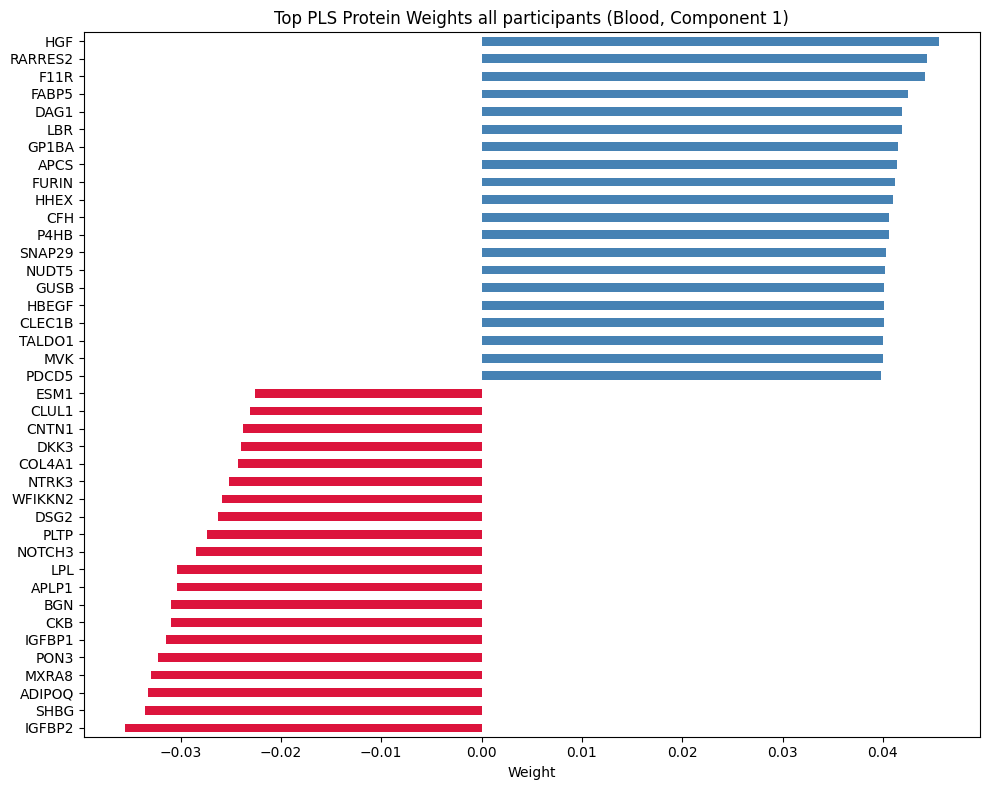

In [43]:
sorted_weights = protein_weights.sort_values()
top_n = 20
top_weights = pd.concat([sorted_weights.head(top_n), sorted_weights.tail(top_n)])
plt.figure(figsize=(10, 8))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Protein Weights all participants (Blood, Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [44]:
# Extract weights
pheno_weights = pd.Series(
    pls_model.y_weights_.flatten(),
    index=Y_Blood_all_clean.columns,
    name="PLS_Component_1_Weight"
)

# Sort by absolute weight (strongest influence on component)
top_pheno = pheno_weights.abs().sort_values(ascending=False).head(20)

# Display top 20 proteins (with their signed weights)
print(pheno_weights.loc[top_pheno.index])

Platelet count                                0.015632
Platelet crit                                 0.013438
High light scatter reticulocyte count         0.009628
High light scatter reticulocyte percentage    0.008504
RBC (erythrocyte) count                       0.008128
Mean platelet (thrombocyte) volume           -0.007914
Haematocrit percentage                        0.007220
Reticulocyte count                            0.006973
Haemoglobin concentration                     0.006457
Reticulocyte percentage                       0.005954
Immature reticulocyte fraction                0.005805
RBC (erythrocyte) distribution width          0.003288
Mean corpuscular haemoglobin                 -0.002934
Mean corpuscular volume                      -0.002672
Platelet distribution width                  -0.002511
Mean corpuscular haemoglobin concentration   -0.002248
Mean sphered cell volume                     -0.001893
Nucleated red blood cell percentage          -0.000508
Mean retic

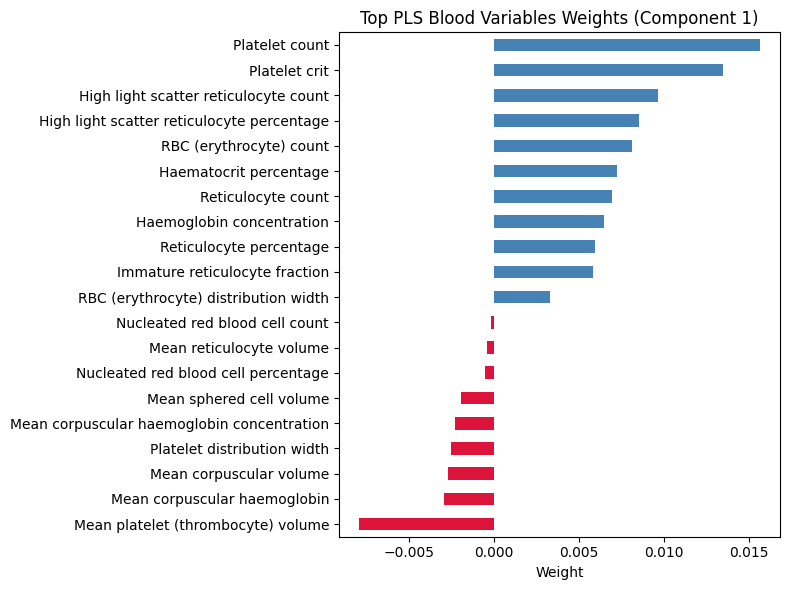

In [45]:
sorted_weights = pheno_weights.sort_values()
#top_n = 12
top_weights = sorted_weights
plt.figure(figsize=(8, 6))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Blood Variables Weights (Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [46]:
# 1. Standardize protein data
X_standardized = (X_Blood_all_clean - X_Blood_all_clean.mean()) / X_Blood_all_clean.std()

In [47]:
# 2. Run PCA and extract the first principal component
pca = PCA(n_components=1)
pc1 = pca.fit_transform(X_standardized)

In [48]:
# 3. Regress out PC1 from each protein
X_residualized = pd.DataFrame(index=X_standardized.index, columns=X_standardized.columns)
for col in X_standardized.columns:
    model = LinearRegression()
    model.fit(pc1, X_standardized[col])
    predicted = model.predict(pc1)
    residual = X_standardized[col] - predicted
    X_residualized[col] = residual


In [49]:
# 4. the residualized protein data
X_residualized = X_residualized.astype(float)
print("Original X shape:", X_Blood_all_clean.shape)
print("Residualized X shape:", X_residualized.shape)

Original X shape: (39943, 2923)
Residualized X shape: (39943, 2923)


In [50]:
# 1. Split the residualized data
X_train_resid, X_test_resid, Y_train_resid, Y_test_resid = train_test_split(
    X_residualized, Y_Blood_all_clean, test_size=0.2, random_state=42
)
# 2. Define and fit the PLS model
pls_model_resid = PLSRegression(n_components=1)
pls_model_resid.fit(X_train_resid, Y_train_resid)

# 3. Predict on the test set
Y_pred_resid = pls_model_resid.predict(X_test_resid)

In [51]:
# 4. Evaluate performance
r2_resid = r2_score(Y_test_resid, Y_pred_resid)
r2_resid

0.043520145426318796

In [52]:
# 5. Extract top X weights (proteins)
protein_weights_resid = pd.Series(
    pls_model_resid.x_weights_.flatten(),
    index=X_residualized.columns,
    name="PLS_Component_1_Weight"
)
top_proteins_resid = protein_weights_resid.abs().sort_values(ascending=False).head(10)
top_protein_weights = protein_weights_resid.loc[top_proteins_resid.index]
top_protein_weights

CDHR2     0.079996
ACY1      0.070918
PSPN      0.067480
INSL3     0.067392
ADIPOQ   -0.065592
SSC4D     0.065521
DCXR      0.064385
CALCA     0.064123
ADH4      0.064006
LPL      -0.063900
Name: PLS_Component_1_Weight, dtype: float64

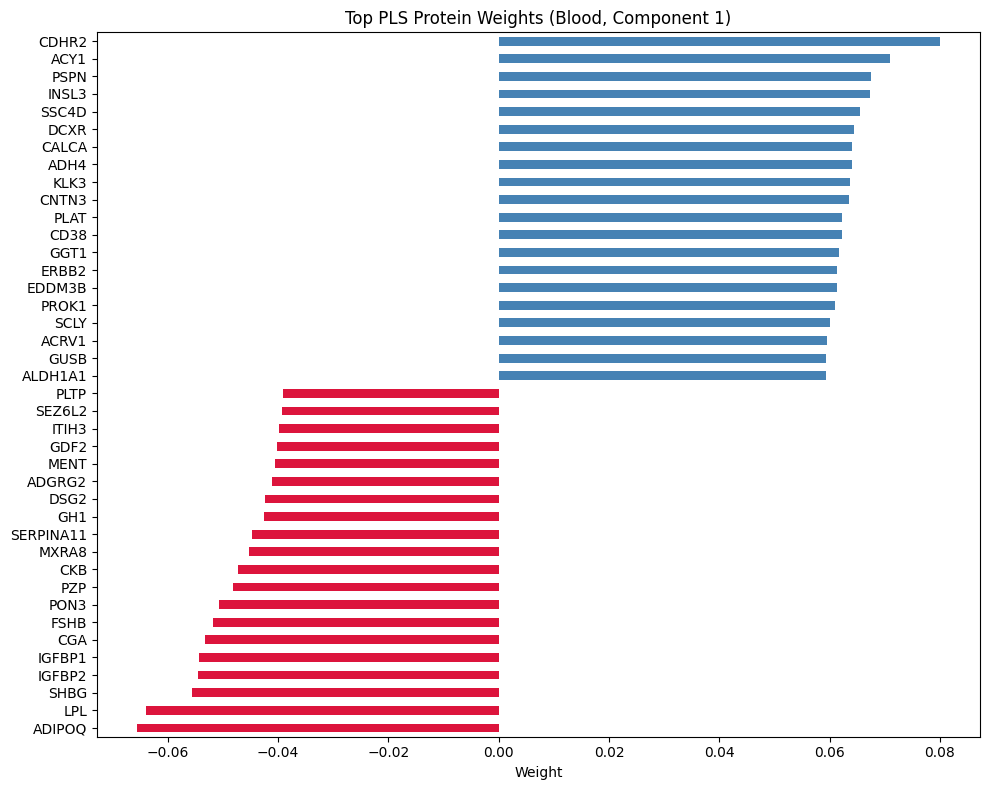

In [53]:
sorted_weights = protein_weights_resid.sort_values()
top_n = 20
top_weights = pd.concat([sorted_weights.head(top_n), sorted_weights.tail(top_n)])
plt.figure(figsize=(10, 8))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Protein Weights (Blood, Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [54]:
# 6. Extract top Y weights (phenotypes)
pheno_weights_resid = pd.Series(
    pls_model_resid.y_weights_.flatten(),
    index=Y_Blood_all_clean.columns,
    name="PLS_Component_1_Weight"
)
top_pheno_resid = pheno_weights_resid.abs().sort_values(ascending=False).head(20)
top_pheno_weights = pheno_weights_resid.loc[top_pheno_resid.index]

top_pheno_weights

Haemoglobin concentration                     0.039110
Haematocrit percentage                        0.037653
RBC (erythrocyte) count                       0.035301
High light scatter reticulocyte count         0.032590
High light scatter reticulocyte percentage    0.027442
Reticulocyte count                            0.022070
Immature reticulocyte fraction                0.020623
Reticulocyte percentage                       0.017407
Platelet count                               -0.016947
Platelet distribution width                   0.016736
Platelet crit                                -0.016224
Mean sphered cell volume                     -0.005991
RBC (erythrocyte) distribution width          0.005838
Mean corpuscular haemoglobin concentration    0.005513
Mean platelet (thrombocyte) volume            0.005283
Mean corpuscular haemoglobin                  0.003617
Mean reticulocyte volume                      0.002561
Nucleated red blood cell percentage          -0.000393
Nucleated 

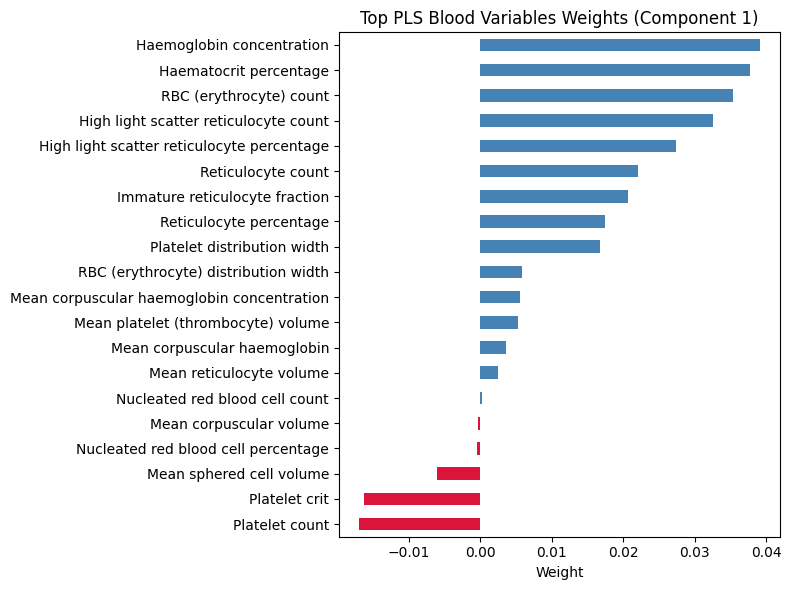

In [55]:
sorted_weights = pheno_weights_resid.sort_values()
# top_n = 20
top_weights = sorted_weights
plt.figure(figsize=(8, 6))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Blood Variables Weights (Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [56]:
pls_scores = pls_model.transform(X_Blood_all_clean)

In [57]:
Blood_pheno = Blood_pheno.loc[X_Blood_all_clean.index].copy() 
Blood_pheno["PLS_Blood_Component1"] = pls_scores[:, 0]

In [58]:
icd10_codes_mapping = {
    'alzheimer': ['G300', 'G309', 'G301', 'G310'],
    'dementia': ['F000', 'F001', 'F002', 'F009', 'F010', 'F011', 'F012', 'F013', 'F018', 'F019', 'F020', 'F021', 'F022', 'F023', 'F024', 'F028'],
    'stroke': ['I689', 'I635', 'I633', 'I638', 'I634'],
    'lbd': ['G318'],  
    'ms': ['G35'],  
    'als': ['G122'],  
    'parkinson': ['G20'],
    'delirium': ['F051'],   # Overlaps with dementia in older adults 
    'neurocognitive_disorder' : ['F067'], 
    'ns_degeneration' : ['G319', 'G328']
    
    }

In [59]:
main_icd10_columns = [col for col in Blood_final_df.columns if col.startswith("Diagnoses_main_ICD10")]
secondary_icd10_columns = [col for col in Blood_final_df.columns if col.startswith("Diagnoses_secondary_ICD10")]
icd10_columns = [col for col in Blood_final_df.columns if col.startswith("Diagnoses_ICD10")]

In [60]:
all_diagnosis_columns = main_icd10_columns + secondary_icd10_columns + icd10_columns

In [61]:
def check_diagnosis(row, disease_codes, diagnosis_columns):
    for col in diagnosis_columns:
        if col in row:
            for code in disease_codes:
                if code in str(row[col]): 
                    return 1  
    return 0

In [62]:
# Binary columns for each diseases 
for disease, codes in icd10_codes_mapping.items():
    column_name = disease.lower() 
    Blood_pheno[column_name] = Blood_pheno.apply(lambda row: check_diagnosis(row, codes, all_diagnosis_columns), axis=1)

In [63]:
disease_columns = ['alzheimer', 'dementia', 'stroke', 'lbd', 'ms', 'als', 'parkinson', 'delirium', 'neurocognitive_disorder', 'ns_degeneration']
for disease in disease_columns:
    total = Blood_pheno[disease].sum()
    print(f"participants diagnosed with {disease.capitalize()}: {total}")

participants diagnosed with Alzheimer: 534
participants diagnosed with Dementia: 727
participants diagnosed with Stroke: 382
participants diagnosed with Lbd: 108
participants diagnosed with Ms: 327
participants diagnosed with Als: 235
participants diagnosed with Parkinson: 720
participants diagnosed with Delirium: 176
participants diagnosed with Neurocognitive_disorder: 114
participants diagnosed with Ns_degeneration: 234


In [64]:
pls_columns = ["PLS_Blood_Component1"]

diagnosis_columns = ["alzheimer", "dementia", "stroke", "lbd", "ms", "als", "parkinson", "delirium", "neurocognitive_disorder", "ns_degeneration"]

In [65]:
t_test_results = {}

for pls in pls_columns:
    for diagnosis in diagnosis_columns:
        if pls not in Blood_pheno.columns or diagnosis not in Blood_pheno.columns:
            print(f"Skipping {pls} or {diagnosis} because it's missing from dataset.")
            continue
        
        diagnosed_group = Blood_pheno[Blood_pheno[diagnosis] == 1][pls].dropna()
        non_diagnosed_group = Blood_pheno[Blood_pheno[diagnosis] == 0][pls].dropna()
        
        
        t_stat, p_value = ttest_ind(diagnosed_group, non_diagnosed_group, nan_policy='omit')
        
        t_test_results[(pls, diagnosis)] = {"t_stat": t_stat, "p_value": p_value}
t_test_results_df = pd.DataFrame.from_dict(t_test_results, orient='index')

t_test_results_df

t_stat   p_value
PLS_Blood_Component1 alzheimer               -0.023546  0.981215
                     dementia                 0.480495  0.630878
                     stroke                   3.560263  0.000371
                     lbd                      0.301412  0.763102
                     ms                      -1.080552  0.279903
                     als                      1.548579  0.121491
                     parkinson                0.415682  0.677645
                     delirium                -0.386810  0.698899
                     neurocognitive_disorder  1.851988  0.064035
                     ns_degeneration          1.420510  0.155467

C:\Users\Romina\AppData\Local\Temp\ipykernel_31660\1820767954.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Romina\AppData\Local\Temp\ipykernel_31660\1820767954.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Romina\AppData\Local\Temp\ipykernel_31660\1820767954.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Romina\AppData\Local\Temp\ipykernel_31660\1820767954.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable t

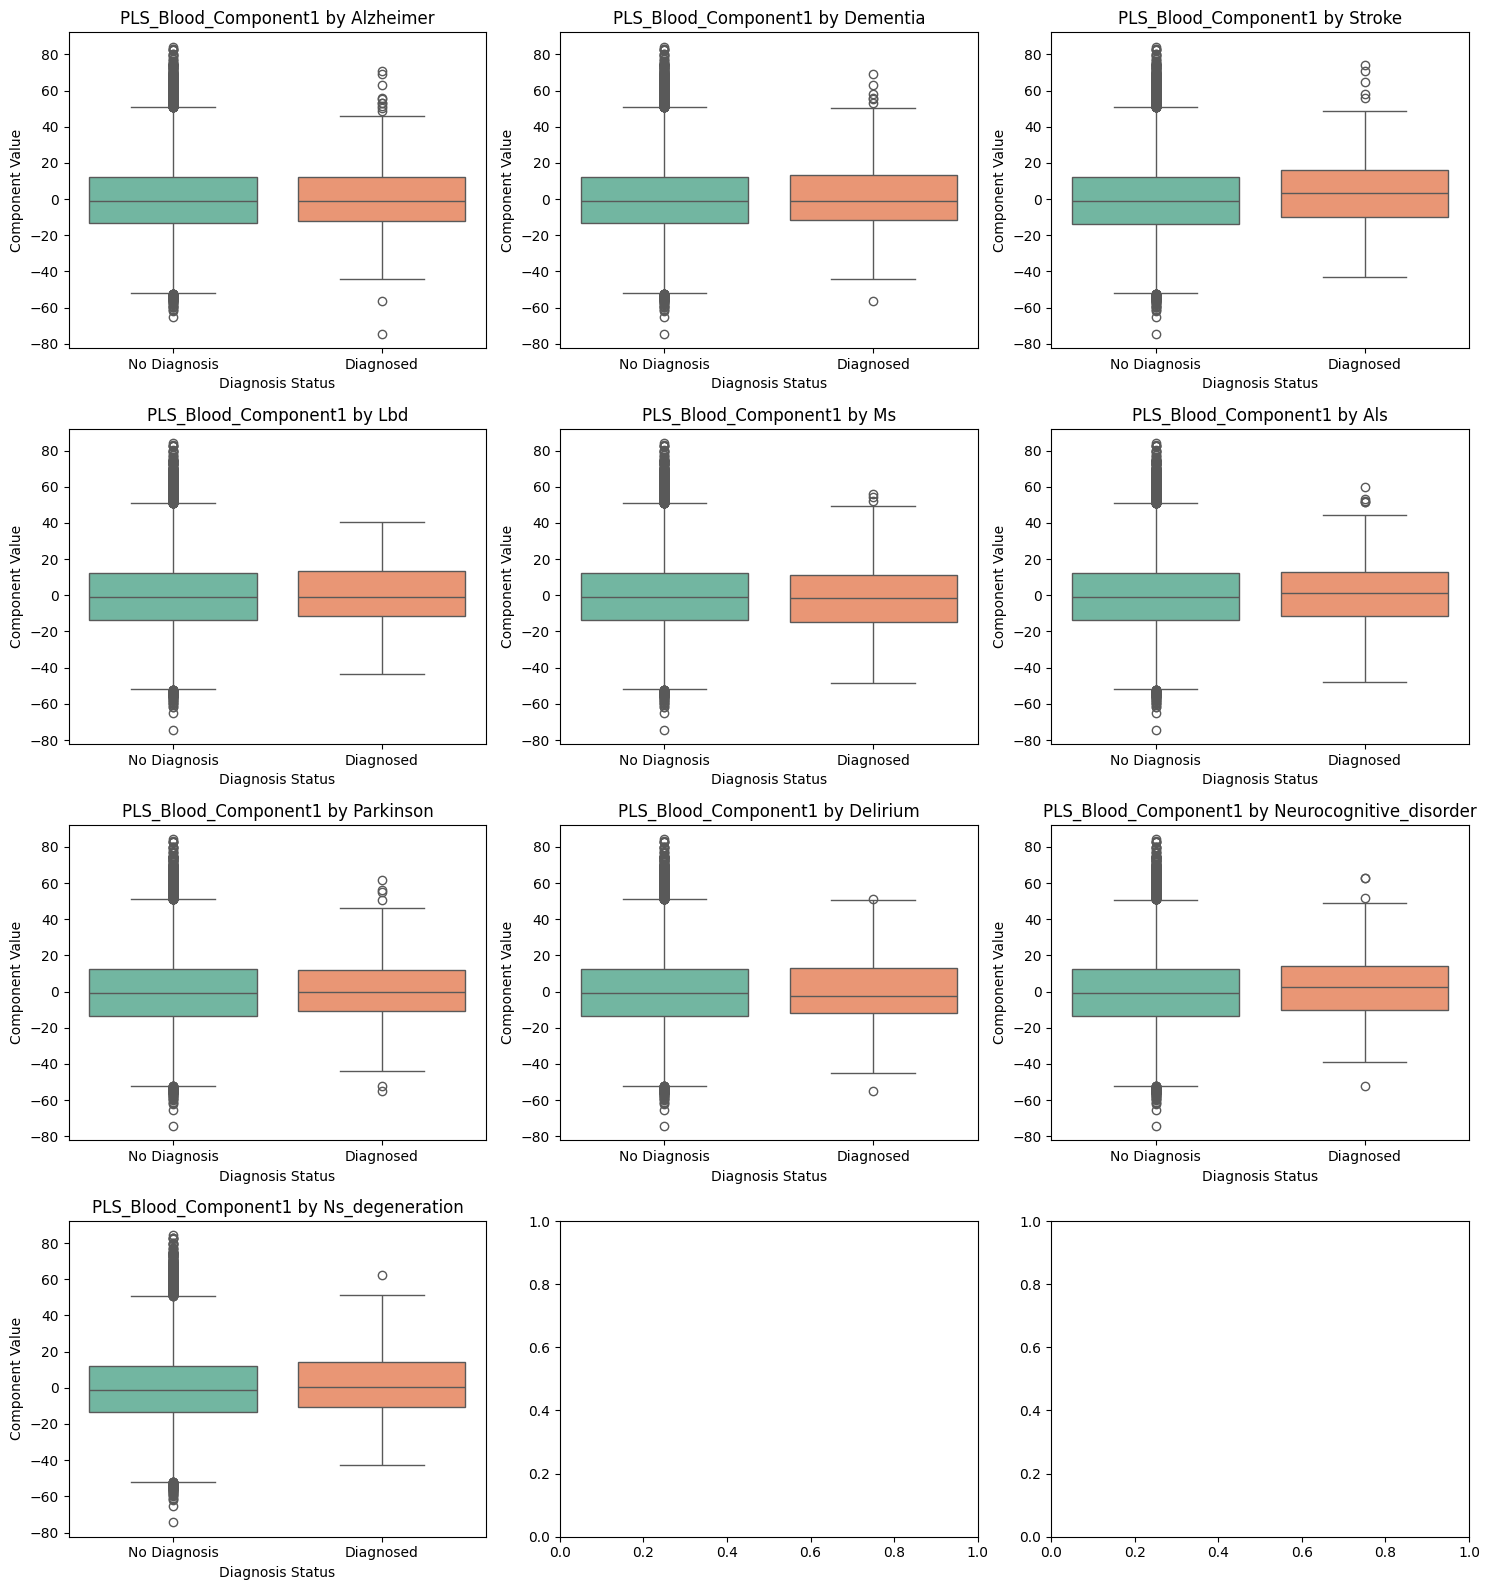

In [66]:
diseases = ["alzheimer", "dementia", "stroke", "lbd", "ms", "als", 
            "parkinson", "delirium", "neurocognitive_disorder", "ns_degeneration"]

component_col = "PLS_Blood_Component1"

n_cols = 3
n_rows = (len(diseases) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, disease in enumerate(diseases):
    ax = axes[i]
    
    plot_df = Blood_pheno[[component_col, disease]].dropna().copy()
    plot_df[disease] = plot_df[disease].map({0: "No Diagnosis", 1: "Diagnosed"})
    
    sns.boxplot(
        x=disease, 
        y=component_col, 
        data=plot_df, 
        palette="Set2", 
        ax=ax,
        order=["No Diagnosis", "Diagnosed"]  # Forces consistent order
    )
    
    ax.set_title(f"{component_col} by {disease.capitalize()}")
    ax.set_xlabel("Diagnosis Status")
    ax.set_ylabel("Component Value")
plt.tight_layout()
plt.show()

In [67]:
Blood_pheno = Blood_final_df[ (Blood_final_df["Blood features"] == 1) & (Blood_final_df["imaging"] == 1)].copy()
print("Number of participants with Blood variables and imaging:", Blood_pheno.shape[0])

Number of participants with Blood variables and imaging: 4541


In [68]:
# Protein columns
protein_cols = Blood_pheno.loc[:, "A1BG": "ZPR1"].columns
X_Blood = Blood_pheno[protein_cols]

In [69]:
start_col = "RBC (erythrocyte) count"
end_col = "High light scatter reticulocyte count"
Blood_outcome_cols = Blood_pheno.loc[:, start_col:end_col].columns

In [70]:
Y_Blood = Blood_pheno[Blood_outcome_cols]
print("X shape:", X_Blood.shape)
print("Y shape:", Y_Blood.shape)

X shape: (4541, 2923)
Y shape: (4541, 20)


In [71]:
X_Blood_clean = X_Blood.dropna()
Y_Blood_clean = Y_Blood.loc[X_Blood_clean.index].dropna()

X_Blood_clean = X_Blood_clean.loc[Y_Blood_clean.index]
print("Clean X shape:", X_Blood_clean.shape)
print("Clean Y shape:", Y_Blood_clean.shape)

Clean X shape: (4541, 2923)
Clean Y shape: (4541, 20)


In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_Blood_clean, Y_Blood_clean, test_size=0.2, random_state=42
)

pls_model = PLSRegression(n_components=1)

pls_model.fit(X_train, Y_train)

Y_pred = pls_model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
print("PLS Regression Test R² Score:", r2)

PLS Regression Test R² Score: 0.020698926358819158


In [73]:
# Extract weights
protein_weights = pd.Series(
    pls_model.x_weights_.flatten(),
    index=X_Blood_clean.columns,
    name="PLS_Component_1_Weight"
)

# Sort by absolute weight (strongest influence on component)
top_proteins = protein_weights.abs().sort_values(ascending=False).head(10)

print(protein_weights.loc[top_proteins.index])

SSC4D    0.061092
CDHR2    0.057847
ACY1     0.057473
HGF      0.054742
GUSB     0.054113
PLAT     0.053957
SCLY     0.053422
CNTN3    0.052089
DCXR     0.051330
SELE     0.050881
Name: PLS_Component_1_Weight, dtype: float64


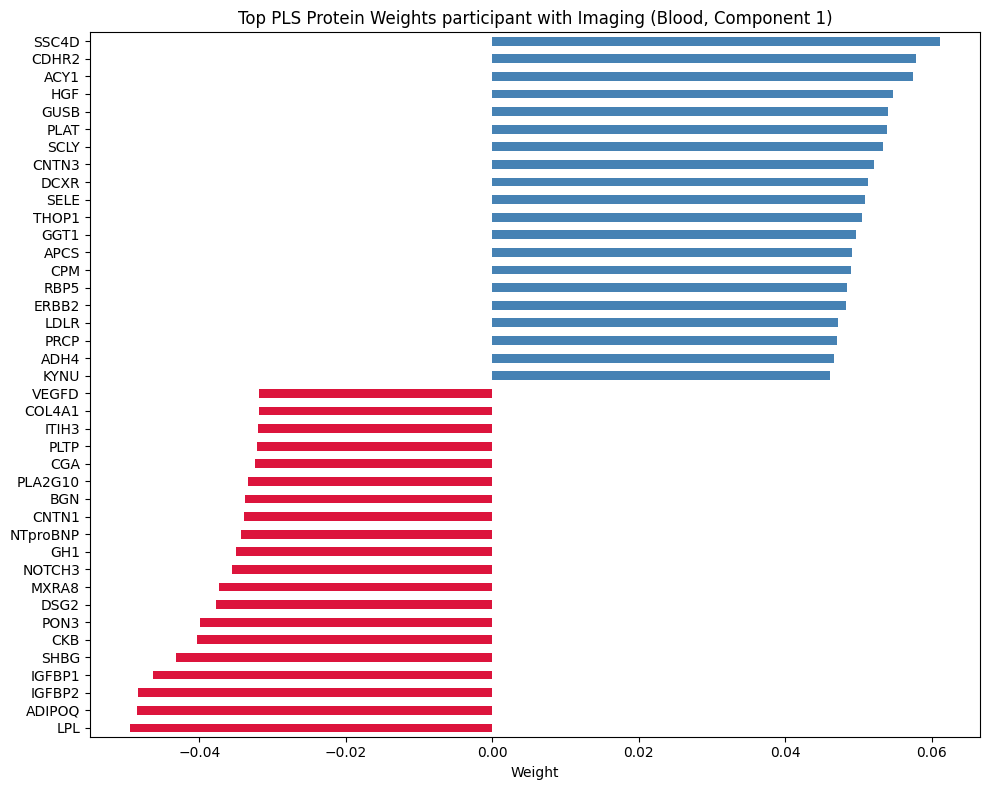

In [74]:
sorted_weights = protein_weights.sort_values()
top_n = 20
top_weights = pd.concat([sorted_weights.head(top_n), sorted_weights.tail(top_n)])
plt.figure(figsize=(10, 8))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Protein Weights participant with Imaging (Blood, Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [75]:
# Extract weights
pheno_weights = pd.Series(
    pls_model.y_weights_.flatten(),
    index=Y_Blood_clean.columns,
    name="PLS_Component_1_Weight"
)

# Sort by absolute weight (strongest influence on component)
top_pheno = pheno_weights.abs().sort_values(ascending=False).head(12)

# Display top 20 proteins (with their signed weights)
print(pheno_weights.loc[top_pheno.index])

RBC (erythrocyte) count                       0.018573
Haematocrit percentage                        0.018226
Haemoglobin concentration                     0.017318
High light scatter reticulocyte count         0.014396
Platelet count                                0.013414
Reticulocyte count                            0.012834
High light scatter reticulocyte percentage    0.011581
Platelet crit                                 0.010913
Reticulocyte percentage                       0.009784
Mean platelet (thrombocyte) volume           -0.008524
Immature reticulocyte fraction                0.006242
Mean corpuscular volume                      -0.003414
Name: PLS_Component_1_Weight, dtype: float64


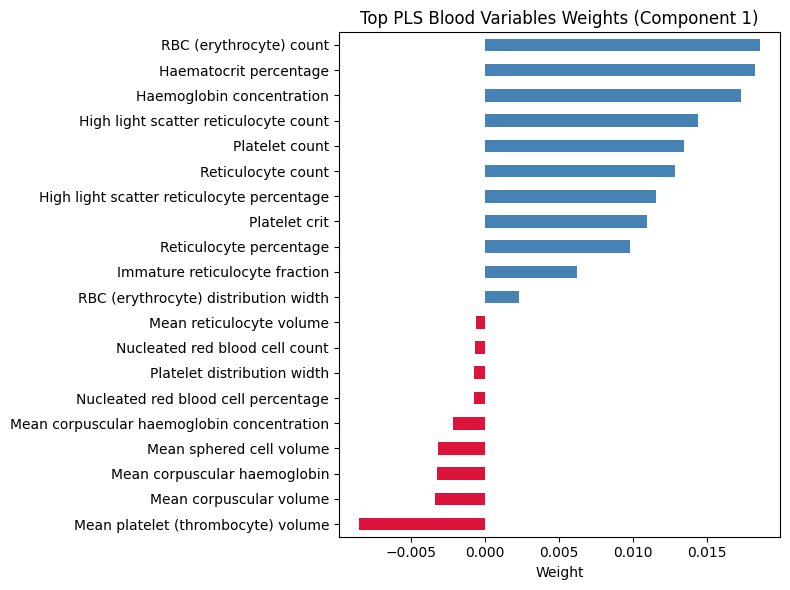

In [76]:
sorted_weights = pheno_weights.sort_values()
#top_n = 12
top_weights = sorted_weights
plt.figure(figsize=(8, 6))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Blood Variables Weights (Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [77]:
# 1. Standardize protein data
X_standardized = (X_Blood_clean - X_Blood_clean.mean()) / X_Blood_clean.std()
# 2. Run PCA and extract the first principal component
pca = PCA(n_components=1)
pc1 = pca.fit_transform(X_standardized)
# 3. Regress out PC1 from each protein
X_residualized = pd.DataFrame(index=X_standardized.index, columns=X_standardized.columns)
for col in X_standardized.columns:
    model = LinearRegression()
    model.fit(pc1, X_standardized[col])
    predicted = model.predict(pc1)
    residual = X_standardized[col] - predicted
    X_residualized[col] = residual

# 4. the residualized protein data
X_residualized = X_residualized.astype(float)
print("Original X shape:", X_Blood_clean.shape)
print("Residualized X shape:", X_residualized.shape)

Original X shape: (4541, 2923)
Residualized X shape: (4541, 2923)


In [78]:
# 1. Split the residualized data
X_train_resid, X_test_resid, Y_train_resid, Y_test_resid = train_test_split(
    X_residualized, Y_Blood_clean, test_size=0.2, random_state=42
)

# 2. Define and fit the PLS model
pls_model_resid = PLSRegression(n_components=1)
pls_model_resid.fit(X_train_resid, Y_train_resid)

# 3. Predict on the test set
Y_pred_resid = pls_model_resid.predict(X_test_resid)

# 4. Evaluate performance
r2_resid = r2_score(Y_test_resid, Y_pred_resid)
r2_resid

0.052553528758218504

In [79]:
# 5. Extract top X weights (proteins)
protein_weights_resid = pd.Series(
    pls_model_resid.x_weights_.flatten(),
    index=X_residualized.columns,
    name="PLS_Component_1_Weight"
)
top_proteins_resid = protein_weights_resid.abs().sort_values(ascending=False).head(10)
top_protein_weights = protein_weights_resid.loc[top_proteins_resid.index]
top_protein_weights

CDHR2    0.082437
SSC4D    0.075873
ACY1     0.073542
PSPN     0.068777
DCXR     0.068757
CNTN3    0.067946
CD38     0.067404
LPL     -0.067254
PLAT     0.065073
GGT1     0.064621
Name: PLS_Component_1_Weight, dtype: float64

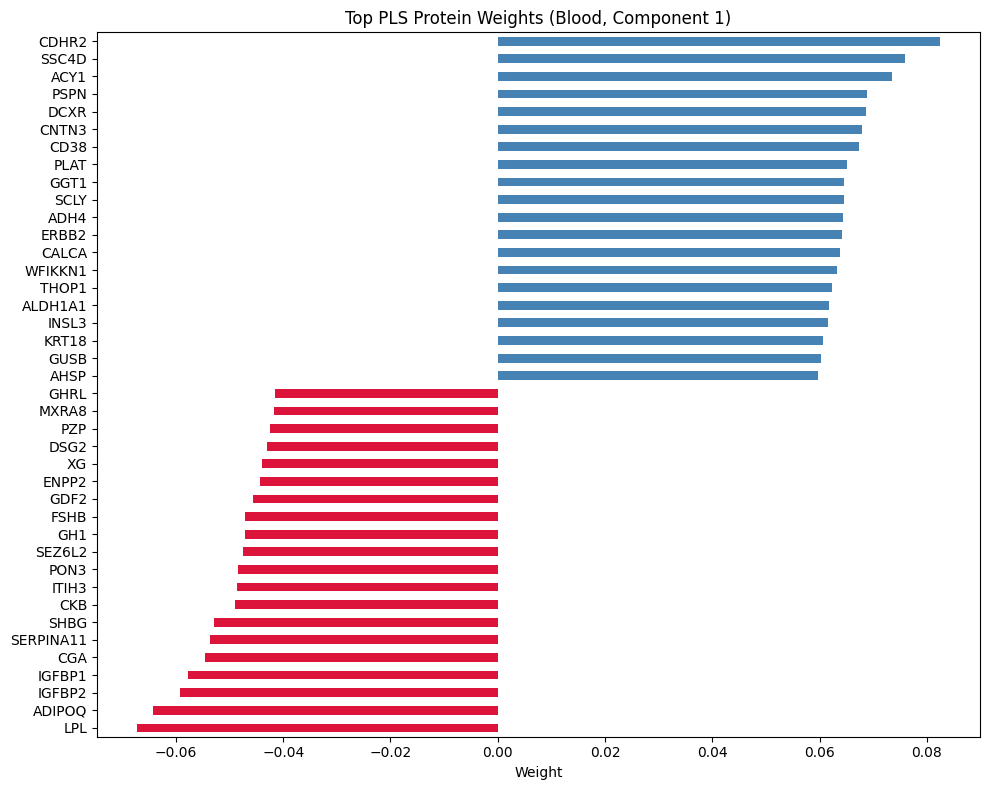

In [80]:
sorted_weights = protein_weights_resid.sort_values()
top_n = 20
top_weights = pd.concat([sorted_weights.head(top_n), sorted_weights.tail(top_n)])
plt.figure(figsize=(10, 8))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Protein Weights (Blood, Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [81]:
# 6. Extract top Y weights (phenotypes)
pheno_weights_resid = pd.Series(
    pls_model_resid.y_weights_.flatten(),
    index=Y_Blood_clean.columns,
    name="PLS_Component_1_Weight"
)
top_pheno_resid = pheno_weights_resid.abs().sort_values(ascending=False).head(20)
top_pheno_weights = pheno_weights_resid.loc[top_pheno_resid.index]

top_pheno_weights

Haemoglobin concentration                     0.054118
Haematocrit percentage                        0.052263
RBC (erythrocyte) count                       0.050754
High light scatter reticulocyte count         0.034939
Reticulocyte count                            0.030127
High light scatter reticulocyte percentage    0.027430
Reticulocyte percentage                       0.021926
Platelet count                               -0.019981
Platelet crit                                -0.019184
Platelet distribution width                   0.019162
Immature reticulocyte fraction                0.016600
Mean sphered cell volume                     -0.011582
Mean corpuscular haemoglobin concentration    0.008867
Mean corpuscular volume                      -0.003568
Mean corpuscular haemoglobin                  0.003228
Mean platelet (thrombocyte) volume            0.002945
Mean reticulocyte volume                     -0.002443
Nucleated red blood cell count                0.000690
RBC (eryth

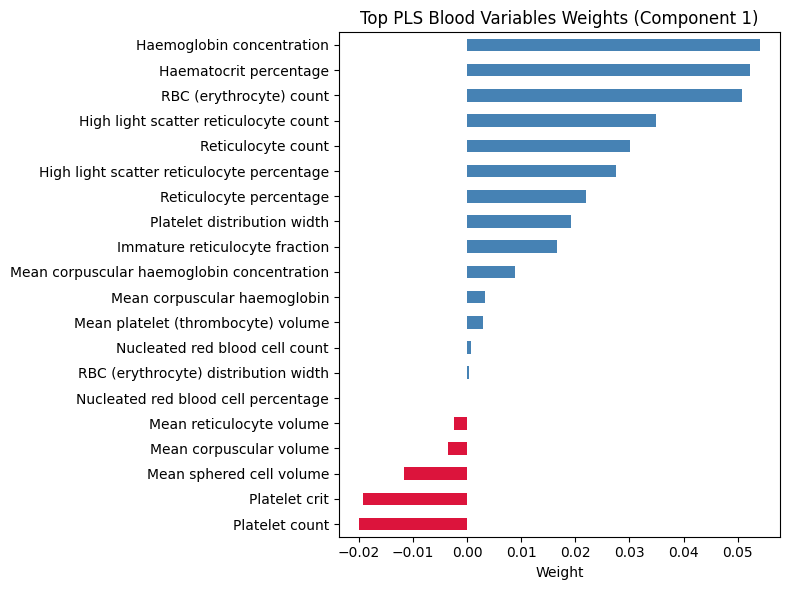

In [82]:
sorted_weights = pheno_weights_resid.sort_values()
# top_n = 20
top_weights = sorted_weights
plt.figure(figsize=(8, 6))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Blood Variables Weights (Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [83]:
pls_scores = pls_model.transform(X_Blood_clean)

In [84]:
Blood_pheno = Blood_pheno.loc[X_Blood_clean.index].copy() 
Blood_pheno["PLS_Blood_Component1"] = pls_scores[:, 0]

In [85]:
Blood_region_cols = [col for col in Blood_pheno.columns if "Mean_Thickness_" in col]

# Covariates to adjust for
covariates = ["Age_at_recruitment", "Sex"]

# Define which PLS component to analyze
pls_component_col = "PLS_Blood_Component1"

# Initialize dictionaries to store results
t_values_Blood_pls = {}
p_values_Blood_pls = {}

# Perform OLS for each brain region
for Blood_region in Blood_region_cols:
    if Blood_region not in Blood_pheno.columns:
        continue

    X = Blood_pheno[[pls_component_col] + covariates].copy()
    y = Blood_pheno[Blood_region].copy()

    X = sm.add_constant(X)  # Add intercept
    model = sm.OLS(y, X, missing="drop").fit()

    t_values_Blood_pls[Blood_region] = model.tvalues[pls_component_col]
    p_values_Blood_pls[Blood_region] = model.pvalues[pls_component_col]

# Convert results to DataFrames
t_values_Blood_pls_df = pd.DataFrame(t_values_Blood_pls, index=[pls_component_col])
p_values_Blood_pls_df = pd.DataFrame(p_values_Blood_pls, index=[pls_component_col])

# Combine for export
t_values_Blood_pls_df.columns = [f"T-Value_{col}" for col in t_values_Blood_pls_df.columns]
p_values_Blood_pls_df.columns = [f"P-Value_{col}" for col in p_values_Blood_pls_df.columns]

Blood_combined_results_pls = pd.concat([t_values_Blood_pls_df, p_values_Blood_pls_df], axis=1)

Blood_combined_results_pls.to_csv("PLS_Component1_vs_Blood_Thickness.csv")
Blood_combined_results_pls

,T-Value_Mean_Thickness_CaudalAnteriorCingulate_Left_Hemisphere,T-Value_Mean_Thickness_CaudalMiddleFrontal_Left_Hemisphere,T-Value_Mean_Thickness_Cuneus_Left_Hemisphere,T-Value_Mean_Thickness_Entorhinal_Left_Hemisphere,T-Value_Mean_Thickness_Fusiform_Left_Hemisphere,T-Value_Mean_Thickness_InferiorParietal_Left_Hemisphere,T-Value_Mean_Thickness_InferiorTemporal_Left_Hemisphere,T-Value_Mean_Thickness_IsthmusCingulate_Left_Hemisphere,T-Value_Mean_Thickness_LateralOccipital_Left_Hemisphere,T-Value_Mean_Thickness_LateralOrbitoFrontal_Left_Hemisphere,...,P-Value_Mean_Thickness_Precentral_Right_Hemisphere,P-Value_Mean_Thickness_Precuneus_Right_Hemisphere,P-Value_Mean_Thickness_RostralAnteriorCingulate_Right_Hemisphere,P-Value_Mean_Thickness_RostralMiddleFrontal_Right_Hemisphere,P-Value_Mean_Thickness_SuperiorFrontal_Right_Hemisphere,P-Value_Mean_Thickness_SuperiorParietal_Right_Hemisphere,P-Value_Mean_Thickness_SuperiorTemporal_Right_Hemisphere,P-Value_Mean_Thickness_Supramarginal_Right_Hemisphere,P-Value_Mean_Thickness_TransverseTemporal_Right_Hemisphere,P-Value_Mean_Thickness_Insula_Right_Hemisphere
PLS_Blood_Component1,-1.699517,-0.425547,1.50338,-3.438631,-0.924515,0.617069,-1.712879,0.009652,1.154506,-1.388706,...,0.335313,0.464876,0.537669,0.282751,0.794185,0.176259,0.012433,0.76971,0.443336,0.164035


In [86]:
# Mapping from your column names to ggseg Desikan-Killiany atlas names
cortical_mapping = {
    "T-Value_Mean_Thickness_CaudalAnteriorCingulate_Left_Hemisphere": "caudalanteriorcingulate_left",
    "T-Value_Mean_Thickness_CaudalMiddleFrontal_Left_Hemisphere": "caudalmiddlefrontal_left",
    "T-Value_Mean_Thickness_Cuneus_Left_Hemisphere": "cuneus_left",
    "T-Value_Mean_Thickness_Entorhinal_Left_Hemisphere": "entorhinal_left",
    "T-Value_Mean_Thickness_Fusiform_Left_Hemisphere": "fusiform_left",
    "T-Value_Mean_Thickness_InferiorParietal_Left_Hemisphere": "inferiorparietal_left",
    "T-Value_Mean_Thickness_InferiorTemporal_Left_Hemisphere": "inferiortemporal_left",
    "T-Value_Mean_Thickness_IsthmusCingulate_Left_Hemisphere": "isthmuscingulate_left",
    "T-Value_Mean_Thickness_LateralOccipital_Left_Hemisphere": "lateraloccipital_left",
    "T-Value_Mean_Thickness_LateralOrbitoFrontal_Left_Hemisphere": "lateralorbitofrontal_left",
    "T-Value_Mean_Thickness_Lingual_Left_Hemisphere": "lingual_left",
    "T-Value_Mean_Thickness_MedialOrbitoFrontal_Left_Hemisphere": "medialorbitofrontal_left",
    "T-Value_Mean_Thickness_MiddleTemporal_Left_Hemisphere": "middletemporal_left",
    "T-Value_Mean_Thickness_Parahippocampal_Left_Hemisphere": "parahippocampal_left",
    "T-Value_Mean_Thickness_Paracentral_Left_Hemisphere": "paracentral_left",
    "T-Value_Mean_Thickness_ParsOpercularis_Left_Hemisphere": "parsopercularis_left",
    "T-Value_Mean_Thickness_ParsOrbitalis_Left_Hemisphere": "parsorbitalis_left",
    "T-Value_Mean_Thickness_ParsTriangularis_Left_Hemisphere": "parstriangularis_left",
    "T-Value_Mean_Thickness_Pericalcarine_Left_Hemisphere": "pericalcarine_left",
    "T-Value_Mean_Thickness_Postcentral_Left_Hemisphere": "postcentral_left",
    "T-Value_Mean_Thickness_PosteriorCingulate_Left_Hemisphere": "posteriorcingulate_left",
    "T-Value_Mean_Thickness_Precentral_Left_Hemisphere": "precentral_left",
    "T-Value_Mean_Thickness_Precuneus_Left_Hemisphere": "precuneus_left",
    "T-Value_Mean_Thickness_RostralAnteriorCingulate_Left_Hemisphere": "rostralanteriorcingulate_left",
    "T-Value_Mean_Thickness_RostralMiddleFrontal_Left_Hemisphere": "rostralmiddlefrontal_left",
    "T-Value_Mean_Thickness_SuperiorFrontal_Left_Hemisphere": "superiorfrontal_left",
    "T-Value_Mean_Thickness_SuperiorParietal_Left_Hemisphere": "superiorparietal_left",
    "T-Value_Mean_Thickness_SuperiorTemporal_Left_Hemisphere": "superiortemporal_left",
    "T-Value_Mean_Thickness_Supramarginal_Left_Hemisphere": "supramarginal_left",
    "T-Value_Mean_Thickness_TransverseTemporal_Left_Hemisphere": "transversetemporal_left",
    "T-Value_Mean_Thickness_Insula_Left_Hemisphere": "insula_left",
    
    "T-Value_Mean_Thickness_CaudalAnteriorCingulate_Right_Hemisphere": "caudalanteriorcingulate_right",
    "T-Value_Mean_Thickness_CaudalMiddleFrontal_Right_Hemisphere": "caudalmiddlefrontal_right",
    "T-Value_Mean_Thickness_Cuneus_Right_Hemisphere": "cuneus_right",
    "T-Value_Mean_Thickness_Entorhinal_Right_Hemisphere": "entorhinal_right",
    "T-Value_Mean_Thickness_Fusiform_Right_Hemisphere": "fusiform_right",
    "T-Value_Mean_Thickness_InferiorParietal_Right_Hemisphere": "inferiorparietal_right",
    "T-Value_Mean_Thickness_InferiorTemporal_Right_Hemisphere": "inferiortemporal_right",
    "T-Value_Mean_Thickness_IsthmusCingulate_Right_Hemisphere": "isthmuscingulate_right",
    "T-Value_Mean_Thickness_LateralOccipital_Right_Hemisphere": "lateraloccipital_right",
    "T-Value_Mean_Thickness_LateralOrbitoFrontal_Right_Hemisphere": "lateralorbitofrontal_right",
    "T-Value_Mean_Thickness_Lingual_Right_Hemisphere": "lingual_right",
    "T-Value_Mean_Thickness_MedialOrbitoFrontal_Right_Hemisphere": "medialorbitofrontal_right",
    "T-Value_Mean_Thickness_MiddleTemporal_Right_Hemisphere": "middletemporal_right",
    "T-Value_Mean_Thickness_Parahippocampal_Right_Hemisphere": "parahippocampal_right",
    "T-Value_Mean_Thickness_Paracentral_Right_Hemisphere": "paracentral_right",
    "T-Value_Mean_Thickness_ParsOpercularis_Right_Hemisphere": "parsopercularis_right",
    "T-Value_Mean_Thickness_ParsOrbitalis_Right_Hemisphere": "parsorbitalis_right",
    "T-Value_Mean_Thickness_ParsTriangularis_Right_Hemisphere": "parstriangularis_right",
    "T-Value_Mean_Thickness_Pericalcarine_Right_Hemisphere": "pericalcarine_right",
    "T-Value_Mean_Thickness_Postcentral_Right_Hemisphere": "postcentral_right",
    "T-Value_Mean_Thickness_PosteriorCingulate_Right_Hemisphere": "posteriorcingulate_right",
    "T-Value_Mean_Thickness_Precentral_Right_Hemisphere": "precentral_right",
    "T-Value_Mean_Thickness_Precuneus_Right_Hemisphere": "precuneus_right",
    "T-Value_Mean_Thickness_RostralAnteriorCingulate_Right_Hemisphere": "rostralanteriorcingulate_right",
    "T-Value_Mean_Thickness_RostralMiddleFrontal_Right_Hemisphere": "rostralmiddlefrontal_right",
    "T-Value_Mean_Thickness_SuperiorFrontal_Right_Hemisphere": "superiorfrontal_right",
    "T-Value_Mean_Thickness_SuperiorParietal_Right_Hemisphere": "superiorparietal_right",
    "T-Value_Mean_Thickness_SuperiorTemporal_Right_Hemisphere": "superiortemporal_right",
    "T-Value_Mean_Thickness_Supramarginal_Right_Hemisphere": "supramarginal_right",
    "T-Value_Mean_Thickness_TransverseTemporal_Right_Hemisphere": "transversetemporal_right",
    "T-Value_Mean_Thickness_Insula_Right_Hemisphere": "insula_right",
}

Processing PLS_Blood_Component1: Extracted 62 valid T-values


<Figure size 800x800 with 0 Axes>

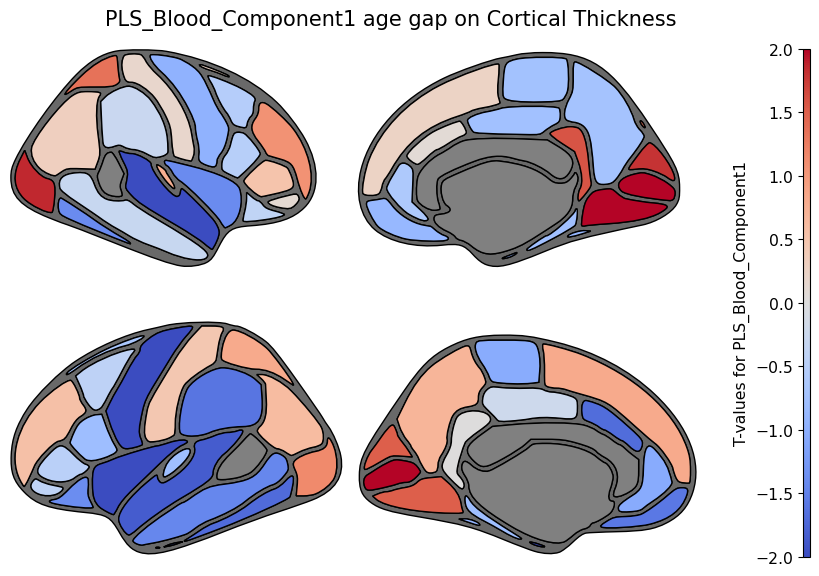

In [87]:
Blood_region_columns = [col for col in t_values_Blood_pls_df.columns if "Mean_Thickness_" in col]
for organ in t_values_Blood_pls_df.index:
    
 
    t_values_Blood_dict = {
        cortical_mapping[col]: t_values_Blood_pls_df.loc[organ, col]
        for col in Blood_region_columns if col in cortical_mapping  
    }

   
    t_values_Blood_dict = {k: v for k, v in t_values_Blood_dict.items() if not pd.isna(v)}

    if not t_values_Blood_dict:
        continue

    
    print(f"Processing {organ}: Extracted {len(t_values_Blood_dict)} valid T-values")

    import ggseg
    plt.figure(figsize=(8, 8))
    ggseg.plot_dk(
        t_values_Blood_dict, cmap="coolwarm", figsize=(8, 8), background="white", 
        edgecolor="black", bordercolor="dimgray", ylabel=f"T-values for {organ}", 
        title=f"{organ} age gap on Cortical Thickness", vminmax=[-2, 2]
    )
    plt.show()

<Figure size 800x800 with 0 Axes>

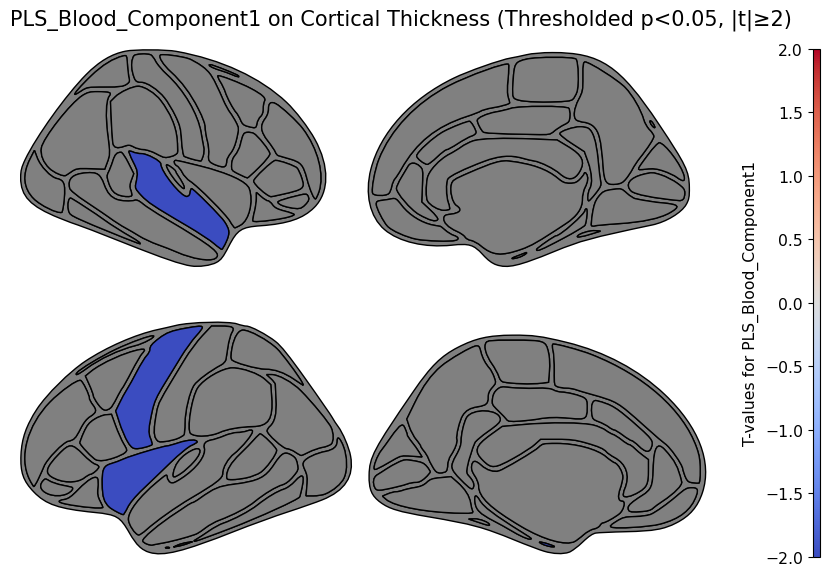

In [88]:
t_values_thresholded_Blood_pls = t_values_Blood_pls_df.copy()

for organ in t_values_Blood_pls_df.index:
    for region in t_values_Blood_pls_df.columns:
        p_value = t_values_Blood_pls_df.loc[organ, region]  
        t_value = t_values_Blood_pls_df.loc[organ, region] 

        
        if p_value >= 0.05 or abs(t_value) < 2:  
            t_values_thresholded_Blood_pls.loc[organ, region] = 0 


for organ in t_values_thresholded_Blood_pls.index:
    t_values_Blood_dict = {
        cortical_mapping[col]: t_values_thresholded_Blood_pls.loc[organ, col]
        for col in t_values_thresholded_Blood_pls.columns if col in cortical_mapping
    }
    
   
    t_values_Blood_dict = {k: v for k, v in t_values_Blood_dict.items() if v != 0}

    
    if t_values_Blood_dict:
        plt.figure(figsize=(8, 8))
        ggseg.plot_dk(
            t_values_Blood_dict, cmap="coolwarm", figsize=(8, 8), background="white", 
            edgecolor="black", bordercolor="gray", ylabel=f"T-values for {organ}", 
            title=f"{organ} on Cortical Thickness (Thresholded p<0.05, |t|≥2)",
            vminmax=[-2, 2]
        )
        plt.show()